# EDS296 Final

**Marina Kochuten, Jordan Sibley, and Josephine Cardelle**

Spring 2025

---

## Introduction

Probably some markdown here

In [1]:
# Import libraries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import intake

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds296-stevenson/share/proj failed


## Metrics Definition

## Data I/O

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')


##### Search through catalog and store results #####
# CMCC Historic
res_cmcc_hist = catalog.search(
    activity_id = 'CMIP',
    source_id = 'CMCC-ESM2',
    experiment_id = 'historical',
    member_id = 'r1i1p1f1',
    table_id = 'Amon',
    variable_id = {'tas', 'pr'}
)

# CMCC SSP585
res_cmcc_fut = catalog.search(
    activity_id = 'ScenarioMIP',
    source_id = 'CMCC-ESM2',
    experiment_id = 'ssp585',
    member_id = 'r1i1p1f1',
    table_id = 'Amon',
    variable_id = {'tas', 'pr'}
)

# CanESM5 Historic
res_can_hist = catalog.search(
    activity_id = 'CMIP',
    source_id = 'CanESM5',
    experiment_id = 'historical',
    member_id = 'r1i1p1f1',
    table_id = 'Amon',
    variable_id = {'tas', 'pr'}
)

# CanESM5 SSP585
res_can_fut = catalog.search(
    activity_id = 'ScenarioMIP',
    source_id = 'CanESM5',
    experiment_id = 'ssp585',
    member_id = 'r1i1p1f1',
    table_id = 'Amon',
    variable_id = {'tas', 'pr'}
)

# Look at the results
display(res_cmcc_hist.df)
display(res_cmcc_fut.df)
display(res_can_hist.df)
display(res_can_fut.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CMCC,CMCC-ESM2,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CMCC/CMCC-ESM2/histo...,NaN,20210114
1,CMIP,CMCC,CMCC-ESM2,historical,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/CMCC/CMCC-ESM2/histo...,NaN,20210114


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,CMCC,CMCC-ESM2,ssp585,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CMCC/CMCC-ESM...,NaN,20210126
1,ScenarioMIP,CMCC,CMCC-ESM2,ssp585,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CMCC/CMCC-ESM...,NaN,20210126


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [3]:
# Grab results and save as xarray objects ----

# Temp
cmcc_temp_hist = xr.open_zarr(res_cmcc_hist.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)
cmcc_temp_fut = xr.open_zarr(res_cmcc_fut.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)
can_temp_hist = xr.open_zarr(res_can_hist.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)
can_temp_fut = xr.open_zarr(res_can_fut.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)

# Precip
cmcc_precip_hist = xr.open_zarr(res_cmcc_hist.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)
cmcc_precip_fut = xr.open_zarr(res_cmcc_fut.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)
can_precip_hist = xr.open_zarr(res_can_hist.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)
can_precip_fut = xr.open_zarr(res_can_fut.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)

In [4]:
# Concat historic and future data for cmcc model ----

# Temp
cmcc_temp_data = xr.concat([cmcc_temp_hist, cmcc_temp_fut], dim="time")

# Precip
cmcc_precip_data = xr.concat([cmcc_precip_hist, cmcc_precip_fut], dim="time")

# Concat historic and future data for can model ----

# Temp
can_temp_data = xr.concat([can_temp_hist, can_temp_fut], dim="time")

#Precip
can_precip_data = xr.concat([can_precip_hist, can_precip_fut], dim="time")

## Metrics Computation

We are interesting in mapping the average over each time period for each of our models and variables. 

First we define our area and time periods of interest 

In [5]:
# Array with region of interest
# [lon_min, lon_max, lat_min, lat_max]
region = [108.31403, 153.6656, -12.303609, 18.847975]

# Array with time periods of interest
# [starting year, ending year]
per_early = [1975, 2025]
per_late = [2026, 2075]

# Convert time to datetime 
cmcc_temp_data['time'] = cmcc_temp_data.time.astype('datetime64[ns]')
can_temp_data['time'] = can_temp_data.time.astype('datetime64[ns]')
cmcc_precip_data['time'] = cmcc_precip_data.time.astype('datetime64[ns]')
can_precip_data['time'] = can_precip_data.time.astype('datetime64[ns]')

# Sort by time to fix time filtering error
cmcc_temp_data = cmcc_temp_data.sortby('time')
can_temp_data = can_temp_data.sortby('time')
cmcc_precip_data = cmcc_precip_data.sortby('time')
can_precip_data = can_precip_data.sortby('time')

In [6]:
# Select data within the ranges of years specified above

##### CMCC-ESM2 #####
# Early period temp
cmcc_temp_early = cmcc_temp_data.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period temp
cmcc_temp_late = cmcc_temp_data.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))
# Early period precip
cmcc_precip_early = cmcc_precip_data.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period precip
cmcc_precip_late = cmcc_precip_data.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))

##### CanESM5 #####
# Early period temp
can_temp_early = can_temp_data.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period temp
can_temp_late = can_temp_data.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))
# Early period precip
can_precip_early = can_precip_data.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period precip
can_precip_late = can_precip_data.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))

In [7]:
# Calculate time averages and convert

##### CMCC-ESM2 #####
# Temp
cmcc_temp_early_annmn = cmcc_temp_early.mean(dim="time") - 273.15
cmcc_temp_late_annmn = cmcc_temp_late.mean(dim="time") - 273.15
# Precip
cmcc_precip_early_annmn = cmcc_precip_early.mean(dim="time")
cmcc_precip_late_annmn = cmcc_precip_late.mean(dim="time")

##### CanESM5 #####
# Temp
can_temp_early_annmn = can_temp_early.mean(dim="time") - 273.15
can_temp_late_annmn = can_temp_late.mean(dim="time") - 273.15
# Precip
can_precip_early_annmn = can_precip_early.mean(dim="time")
can_precip_late_annmn = can_precip_late.mean(dim="time")

## Visualizations

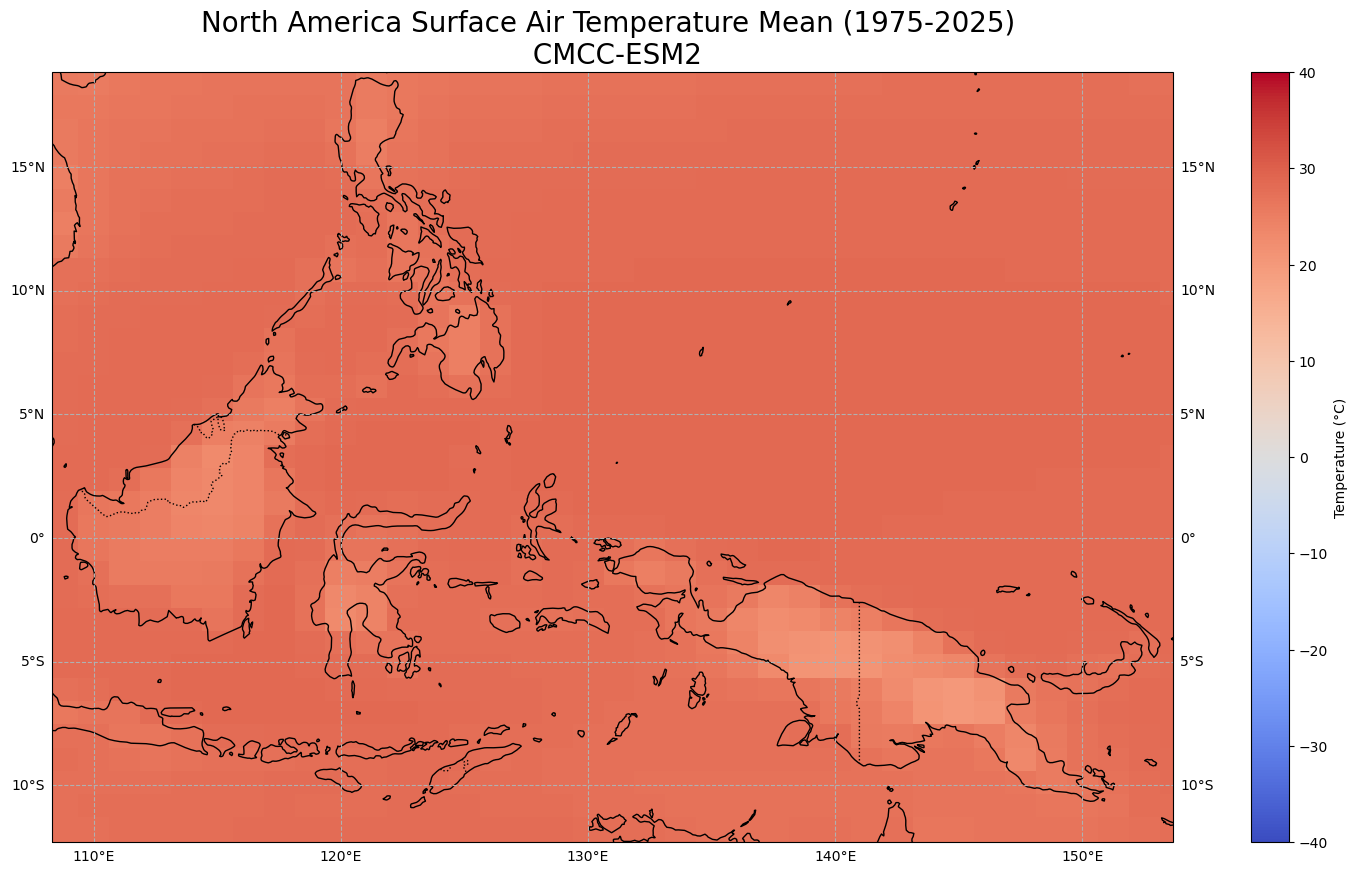

In [8]:
##### CMCC-ESM2 TEMP 1975-2025 #####

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(cmcc_temp_early_annmn.lon, 
                     cmcc_temp_early_annmn.lat, 
                     cmcc_temp_early_annmn["tas"], 
                     transform=map, 
                     cmap="coolwarm", 
                     vmin=-40, 
                     vmax=40)

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False

# Add title, show plot
ax.set_title("North America Surface Air Temperature Mean (1975-2025) \n CMCC-ESM2", fontsize= 20)
plt.show()

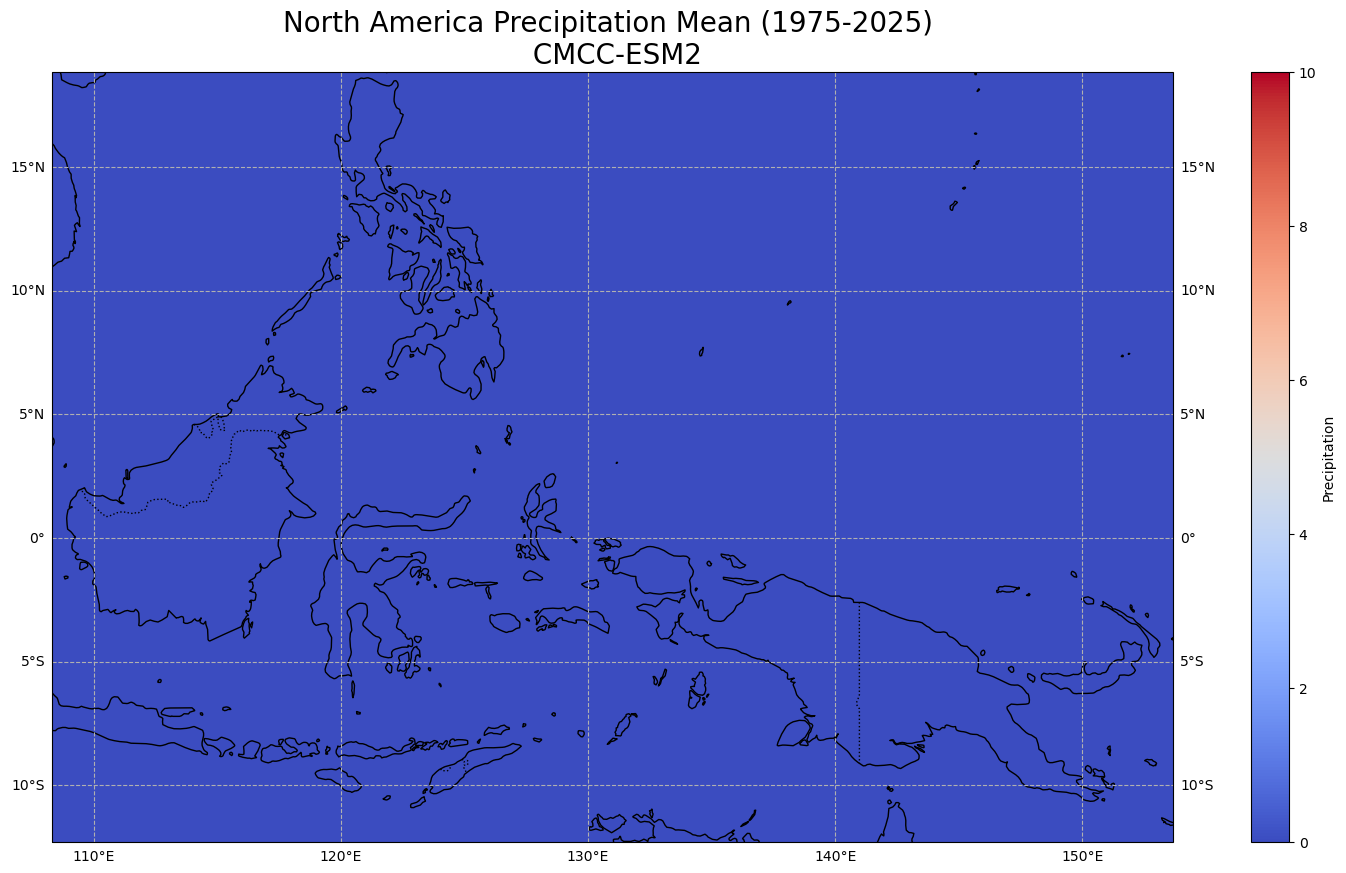

In [11]:
##### CMCC-ESM2 PRECIP 1975-2025 #####

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(cmcc_precip_early_annmn.lon, 
                     cmcc_precip_early_annmn.lat, 
                     cmcc_precip_early_annmn["pr"], 
                     transform=map, 
                     cmap="coolwarm", 
                     vmin=0, 
                     vmax=10)

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Precipitation")

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False

# Add title, show plot
ax.set_title("North America Precipitation Mean (1975-2025) \n CMCC-ESM2", fontsize= 20)
plt.show()

## Conclusions